<a href="https://colab.research.google.com/github/jiseon0516/pdm19/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료
- pooling: feature의 대표적 특징 추출 후 계산(평균값, 최빈값 등) + convolution 반복 후 1차원으로 -> fcn
- hidden layer1: convolution 노드, hidden layer2: 부분으로 된 pooling 노드(부분적 모양), hidden layer3: 부분으로 된 pooling 노드를 다시 pooling으로 모음(전체적 모양)
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [4]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

In [5]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
y_train0 == 5 #인덱스 반환

array([ True, False, False, ...,  True, False, False])

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


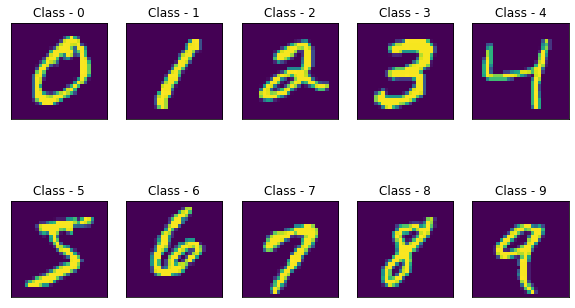

In [9]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i] #처음 나오는 인덱스(i가 레이블 값)
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import Conv2D, MaxPool2D

In [11]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [12]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [13]:
c1f2 = keras.models.Sequential([ #순차모델 cf.함수모델
    Conv2D(input_shape=(28,28,1), filters= 32, #input_shape=(28,28,1): 컬러채널 포함, filters= 32: 32가지의 필터
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), 
            #kernel_size=(3,3): 2차원 필터 3x3, strides=(1,1): 좌 또는 우 이동 시 한칸씩 이동, padding='same': 가장자리쪽 나머지 0으로 채워 모두 convolution 되도록 => 30x30(convolution filter)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), #32*28*28, pool_size=(2,2): 2x2 사이즈로 최대값 찾아내기=>중복x(차원축소위해)=>strides=(2,2):2칸씩 이동
    #convolution 노드 - conv2d, maxpool2d(차원축소)

    #1차원 벡터로 바꾸기
    Flatten(), #max-pooling 된 2차원 행렬을 1차원 벡터로 바꾸는 함수

    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), #과적합 방지
    keras.layers.Dense(10, activation='softmax') 
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy', #one-hot-encoding 했을 때
              metrics=['accuracy']) #정확도 중심으로 계산

In [ ]:
# #convolution layer
# Conv2D(input_shape=(28,28,1), filters= 32, #input_shape=(28,28,1): 컬러채널 포함, filters= 32: 32가지의 필터
#             kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), 
#             #kernel_size=(3,3): 2차원 필터 3x3, strides=(1,1): 좌 또는 우 이동 시 한칸씩 이동, padding='same': 가장자리쪽 나머지 0으로 채워 모두 convolution 되도록 => 30x30(convolution filter)
#     MaxPool2D(pool_size=(2,2), strides=(2,2)), #32*28*28, pool_size=(2,2): 2x2 사이즈로 최대값 찾아내기=>중복x(차원축소위해)=>strides=(2,2):2칸씩 이동
#     #convolution 노드 - conv2d, maxpool2d(차원축소)

#     #1차원 벡터로 바꾸기
#     Flatten(),

In [14]:
c1f2.summary()
#conv2d (Conv2D)             (None, 28, 28, 32)        320 = 3*3*32+32    => 첫번째 convolution layer(3x3 filter)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [15]:
3*3*32+32 
#각 뉴런마다 bias 존재(+32)
#32개의 3x3 필터

320

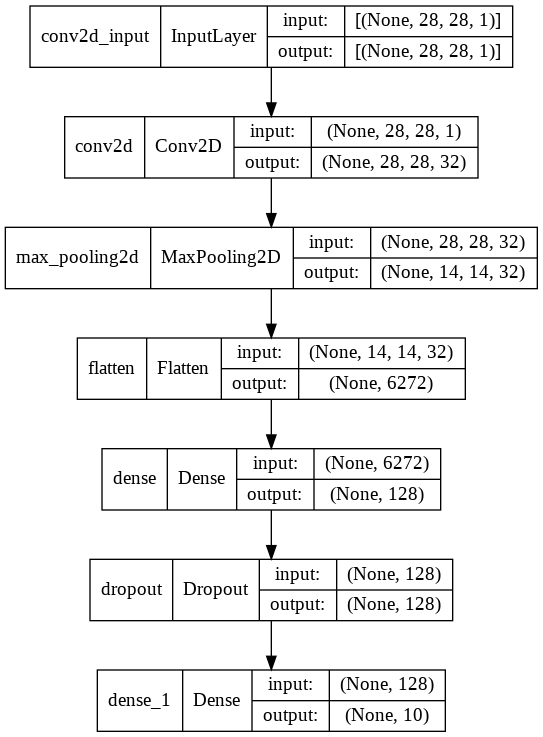

In [16]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [17]:
# c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
#             validation_data = (X_test, y_test))
#ValueError: Shapes (100, 10) and (100, 14, 14, 10) are incompatible - Flatten 하지 않음 - c1f2

c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test)) #test data로 검증

Epoch 1/20
600/600 [==============================] - 14s 8ms/step - loss: 0.2419 - accuracy: 0.9287 - val_loss: 0.0775 - val_accuracy: 0.9753
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0821 - accuracy: 0.9757 - val_loss: 0.0555 - val_accuracy: 0.9816
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0452 - val_accuracy: 0.9846
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0397 - val_accuracy: 0.9864
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0414 - val_accuracy: 0.9866
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0379 - val_accuracy: 0.9872
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0363 - val_accuracy: 0.9875
Epoch

In [18]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 0.9887


[0.04967879131436348, 0.9886999726295471]

---

## **CNN1 + FCN3**
- cnn1 + fcn3(= 2개의 hidden layer와 output layer = 3개의 층)

In [19]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [20]:
c1f3 = tf.keras.models.Sequential([ 
    # tf.keras.layers.Flatten(input_shape=(28, 28)), 
    Conv2D(input_shape=(28,28,1), filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [21]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                      

In [22]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2415 - accuracy: 0.9268
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0749 - accuracy: 0.9772
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0520 - accuracy: 0.9837
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0299 - accuracy: 0.9905
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0202 - accuracy: 0.9936
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0163 - accuracy: 0.9946
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0130 - accuracy: 0.9959

In [23]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0465 - accuracy: 0.9891


[0.04650501534342766, 0.9890999794006348]

## **CNN2 + FCN2**
- convolution 2층 + fcn 2층

In [24]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [25]:
c2f2 = tf.keras.models.Sequential([ 
    # tf.keras.layers.Flatten(input_shape=(28, 28)),
    # tf.keras.layers.Dense(256, activation='relu'),  
    # tf.keras.layers.Dropout(0.25),
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 1개 생성(filter = 64)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 2개 생성(filter = 32), input 정보는 첫 번째만 넣어줌
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(), #특징벡터로 만듦
    tf.keras.layers.Dense(128, activation='relu'),   
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [26]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [27]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100) #validation 없이 훈련만 시킴 -> 빠른 속도
#밑의 accuracy는 training에 대한 accuracy

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2204 - accuracy: 0.9330
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0665 - accuracy: 0.9796
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0465 - accuracy: 0.9856
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0367 - accuracy: 0.9889
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0301 - accuracy: 0.9901
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0253 - accuracy: 0.9923
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0231 - accuracy: 0.9926
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0181 - accuracy: 0.9941
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0158 - accuracy: 0.9947
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0146 - accuracy: 0.9950

In [28]:
c2f2.evaluate(X_test, y_test, batch_size = 100) #convolution 층을 늘리면 정확도 증가

100/100 [==============================] - 1s 6ms/step - loss: 0.0288 - accuracy: 0.9937


[0.028806189075112343, 0.9937000274658203]

## **CNN2 + FCN3**

In [29]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [30]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 1개 생성(filter = 64)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 2개 생성(filter = 32), input 정보는 첫 번째만 넣어줌
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(), #특징벡터로 만듦
    tf.keras.layers.Dense(128, activation='relu'),  #fcn 1층  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(64, activation='relu'),   #fcn 2층
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax') #output layer - 3층
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [31]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [32]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.3017 - accuracy: 0.9075
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0887 - accuracy: 0.9746
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0620 - accuracy: 0.9822
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0504 - accuracy: 0.9858
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0424 - accuracy: 0.9877
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0356 - accuracy: 0.9900
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0324 - accuracy: 0.9908
Epoch 8/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0266 - accuracy: 0.9922
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0245 - accuracy: 0.9927
Epoch 10/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0224 - accuracy: 0.993

In [33]:
c2f3.evaluate(X_test, y_test, batch_size = 100) #c2f2: 99.32, c2f3: 99.27(교수님 결과)
#층을 높이면 정확도 증가하지만 항상은 아님

100/100 [==============================] - 1s 6ms/step - loss: 0.0336 - accuracy: 0.9915


[0.03358699008822441, 0.9915000200271606]

# **[DIY] Hidden layer에 따른 정확도**

In [34]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 0.9887


[0.04967879131436348, 0.9886999726295471]

In [35]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0465 - accuracy: 0.9891


[0.04650501534342766, 0.9890999794006348]

In [36]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0288 - accuracy: 0.9937


[0.028806189075112343, 0.9937000274658203]

In [37]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0336 - accuracy: 0.9915


[0.03358699008822441, 0.9915000200271606]

In [38]:
# Try another method!!
cnn_result = [[0.04967879131436348, 0.9886999726295471], 
 [0.04650501534342766, 0.9890999794006348], 
 [0.028806189075112343, 0.9937000274658203], 
 [0.03358699008822441, 0.9915000200271606]]

In [39]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.9886999726295471,
 0.9890999794006348,
 0.9937000274658203,
 0.9915000200271606]

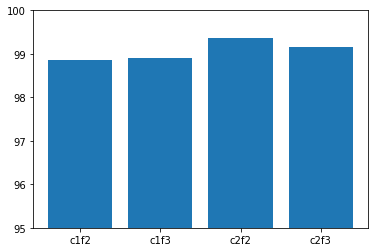

In [40]:
x = np.arange(4)
cnns = ['c1f2','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95, 100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [41]:
c2f2.save('c2f2_best.hdf5')

In [42]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0288 - accuracy: 0.9937


[0.028806189075112343, 0.9937000274658203]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [43]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [44]:
#c2f2 모델 초기화 후 학습시킴, hist 객체에 정보를 담아야 함
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size = 100, 
         validation_data=(X_test,y_test)) #train data로 훈련, test data로 검증

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.0351 - val_accuracy: 0.9922
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0332 - val_accuracy: 0.9928
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0061 - accuracy: 0.9975 - val_loss: 0.0356 - val_accuracy: 0.9922
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0372 - val_accuracy: 0.9917
Epoch 5/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0360 - val_accuracy: 0.9926
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0354 - val_accuracy: 0.9921
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0359 - val_accuracy: 0.9921
Epoc

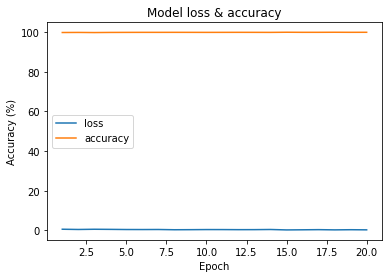

In [45]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

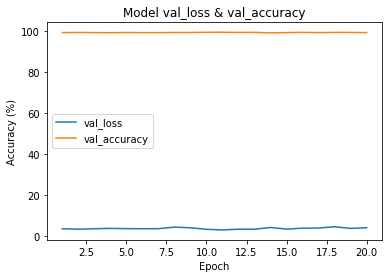

In [46]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

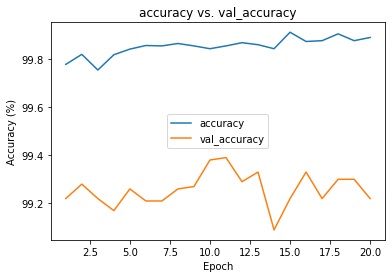

In [47]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.show()

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [48]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [49]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 1개 생성(filter = 64)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 2개 생성(filter = 32), input 정보는 첫 번째만 넣어줌
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(), #특징벡터로 만듦
    tf.keras.layers.Dense(128, activation='relu'),  #fcn 1층  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(64, activation='relu'),   #fcn 2층
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax') #output layer - 3층
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [50]:
# Code here!
hist = c2f3.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size = 100, 
         validation_data=(X_test,y_test)) 

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.3019 - accuracy: 0.9064 - val_loss: 0.0713 - val_accuracy: 0.9773
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0898 - accuracy: 0.9738 - val_loss: 0.0407 - val_accuracy: 0.9868
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0623 - accuracy: 0.9823 - val_loss: 0.0375 - val_accuracy: 0.9890
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0514 - accuracy: 0.9847 - val_loss: 0.0348 - val_accuracy: 0.9879
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0265 - val_accuracy: 0.9919
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0357 - accuracy: 0.9898 - val_loss: 0.0270 - val_accuracy: 0.9910
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0320 - accuracy: 0.9909 - val_loss: 0.0261 - val_accuracy: 0.9914

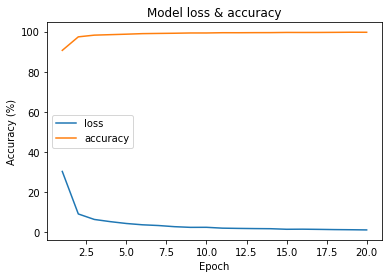

In [51]:
# Plot loass and accuracy
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

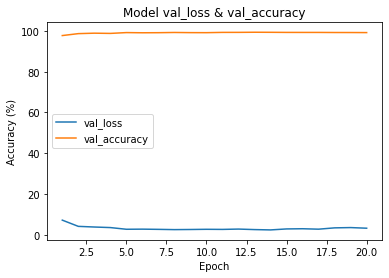

In [52]:
# Plot val_loss and val_accuracy
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()